## Regularization 

helps to solve over fitting problem in machine learning. Simple model will be a very poor generalization of data. At the same time, complex model may not perform well in test data due to over fitting. We need to choose the right model in between simple and complex model. Regularization helps to choose preferred model complexity, so that model is better at predicting. Regularization is nothing but adding a penalty term to the objective function and control the model complexity using that penalty term. It can be used for many machine learning algorithms.

In a simple lay man term, when you have less data and a lot of feature's in your problem, your learned hypothesis may fit the data completely but it does not generalize your problem. By generalization i mean is your hypothesis will not give perfect results for future inputs. So basically you are adding too much details to support your hypothesis. Too much features that may have their effect in some way but not in general. So this kind of situation is called over fitting. And now you need to penalize that extra information to get optimal solution. So you apply regularization techniques. In which you are penalizing some of your features to get a balanced optimal solution.

**Bias-Variance Tradeoff** 
To summarise Bias and Variance in this context, look at the following plot,

In the first plot, we have zero bias as our model perfectly fits the data during training(blue line), but has high variance while predicting the new data(orange).

Whereas the second model, We have model with higher bias and less accurate during training data(blue) but it performs pretty well while predicting the unseen data(test data- orange).

This trade-off between bias and variance during training to get better results for unseen predictions, is nothing but the Bias-Variance Tradeoff.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/variance_bias1.png" width="540" height="240" align="left"/>

With bias-variance tradeoff, you can effectively reduce the test set errors by finding the right balance between the bias and variance of a variety of models. It is particularly critical to understanding this concept for the prediction models.
When we have very low bias during training and high variance during testing, we say that our model has Over fitting.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/variance_bias_tradoff1.png" width="340" height="240" align="left"/>

There are many way to over come the overfitting.We will use Regularization to over come the over fitting in model.

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.
We have 3 type of Regularization techniques.
1. Ridge also Known as L2
2. Lasso also Known as L1
3. Elastic-Net

**Ridge Regression**

Ridge Regression helps us avoid the over fitting by adding the bias in the form of the penalty as know as regularization parameter(Lambda or Alpha). This penalty is added to the Cost/Loss/Error function of the regression which as we know is given by the sum of the squared errors or other errors of predictions. Ridge adds the penalty as follows,

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Ridge.png" width="340" height="240" align="left"/>

The penalty increases the value of the loss function.And Tries to minimise the variance in predictions.

**Lasso Regression**

Lasso is exactly same as Ridge, in the sense that it also adds penalty. But instead of the squared slope/coefficient/weight, it adds the absolute value of the slope/weight as the penalty to Sum squared Error loss function.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Lasso.png" width="240" height="100" align="left"/>

If we take various values of penalty parameter Lambda or Alpha and try to get output with both Lasso and regression regularizations in the linear regression line eguation where we have multiple variables then you will notice that ,Lasso quickly made the coefficient of X to Zero whereas Ridge could reduce it to near zero with large values of Lambda. But Ridge was unable to make it zero even with Lambda as 100 or even 1000.
So in this way we can say that Lasso can reduce the no of unrequired features very quickly.


**Elastic Net Regression**

The combining the penalties of ridge regression and lasso to get the best of both worlds. Elastic Net aims at minimizing the following loss function:

The size of the respective penalty terms Lambda or Alpha can be tuned via cross-validation to find the model's best fit.

#### Lets Understand using the Python Sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet,Ridge,Lasso,LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Lets use the Boston Dataset
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
##print(data.DESCR)

In [5]:
df_boston = pd.DataFrame(data.data)

In [6]:
df_boston.columns = data.feature_names ## Assiging the column Names

In [7]:
df_boston["House_Price"] = data.target

In [8]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df_boston["CHAS"].unique()

array([0., 1.])

In [10]:
## "CHAS" Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) let is delete.
df_boston = df_boston.drop("CHAS",axis=1)

In [11]:
df_boston.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   NOX          506 non-null    float64
 4   RM           506 non-null    float64
 5   AGE          506 non-null    float64
 6   DIS          506 non-null    float64
 7   RAD          506 non-null    float64
 8   TAX          506 non-null    float64
 9   PTRATIO      506 non-null    float64
 10  B            506 non-null    float64
 11  LSTAT        506 non-null    float64
 12  House_Price  506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
## Split the Target and Features 
X = df_boston.iloc[:,:-1]

In [14]:
X_cols = list(X)

In [15]:
Y = df_boston.iloc[:,-1]

In [16]:
print(X.shape)
print(Y.shape)
print(type(X))
print(type(Y))

(506, 12)
(506,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


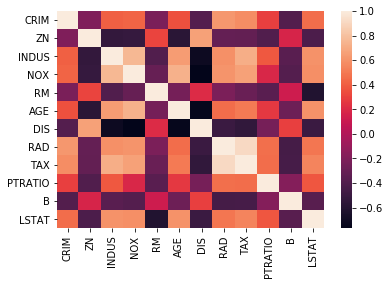

In [17]:
## Plot Heat map to check collinarity
sns.heatmap(X.corr())

We can see there are some variables which have collinarity. We are not deleting any variables now, We are just checking the Regularization so It is not required now.

In [18]:
## Scalling the Data using Standscaler
sd_x = StandardScaler()
sd_x.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
X_scale = sd_x.transform(X)

In [20]:
print(X_scale.shape)
print(type(X_scale))

(506, 12)
<class 'numpy.ndarray'>


In [21]:
df_X_scale = pd.DataFrame(X_scale,columns=X_cols)

In [22]:
df_X_scale.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439


In [23]:
df_X_scale.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


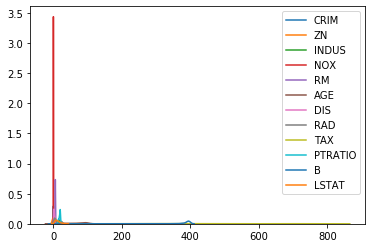

In [24]:
for i in X_cols:
    sns.kdeplot(df_boston[i])

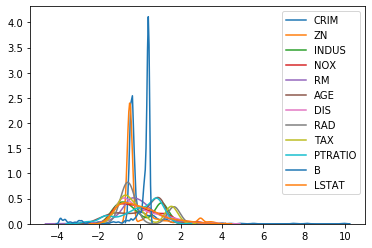

In [25]:
for i in X_cols:
    sns.kdeplot(df_X_scale[i])

In [26]:
## Split the train and test
X_train_s,X_test_s,Y_train_s,Y_test_s = train_test_split(X_scale,Y,test_size = 0.3, random_state = 42)

In [27]:
print(X_train_s.shape)
print(Y_train_s.shape)
print(type(X_test_s))
print(type(Y_test_s))

(354, 12)
(354,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [28]:
## Lets Split without scalling data to just verify later the accuracy
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(type(X_test))
print(type(Y_test))

(354, 12)
(354,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Linear Regression Model

In [30]:
## With Scale Dataset
lin_reg_s = LinearRegression()
MSE_s = cross_val_score(lin_reg_s,X_scale,Y,scoring="neg_mean_squared_error",cv = 5)

In [31]:
MSE_s

array([-12.6721495 , -24.28442268, -27.83877583, -82.08494898,
       -36.50537454])

In [32]:
## lets take the mean of MSE
mean_MSE_s = np.mean(MSE_s)
print("Linear Regression Model MSE with scale dataset : {}".format(mean_MSE_s))

Linear Regression Model MSE with scale dataset : -36.67713430722315


In [33]:
## Without Scale Dataset
lin_reg = LinearRegression()
MSE = cross_val_score(lin_reg,X,Y,scoring="neg_mean_squared_error",cv = 5)

In [34]:
## lets take the mean of MSE and display result
mean_MSE = np.mean(MSE)
print("Linear Regression Model MSE : {}".format(mean_MSE))

Linear Regression Model MSE : -36.677134307223064


### Ridge Regression Model

In [35]:
## With Scalling Dataset
## Now we will use GridsearchCV , This will allow us to automatically perform cross-validation 
## with a range of different regularization parameters in order to find the optimal value of 
## alpha(regularization parameter)

ridge_s = Ridge()
parameter = {"alpha":[1e-2,1,5,10,20,30,40,50,70,100,110,120,130,140,150]}
ridge_reg_s = GridSearchCV(ridge_s,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
ridge_reg_s.fit(X_scale,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 1, 5, 10, 20, 30, 40, 50, 70, 100, 110,
                                   120, 130, 140, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [36]:
### Now get the best MSE and best parameter
print("Ridge Regression Model with Scale dataset MSE : {},Best Parameter{}\n".format(ridge_reg_s.best_score_,ridge_reg_s.best_params_))

Ridge Regression Model with Scale dataset MSE : -32.63538216677022,Best Parameter{'alpha': 70}



In [37]:
## Without scale dataset
## Now we will use GridsearchCV , This will allow us to automatically perform cross-validation 
## with a range of different regularization parameters in order to find the optimal value of 
## alpha(regularization parameter)

ridge = Ridge()
parameter = {"alpha":[1e-15,1e-10,1e-8,1e-5,1e-2,1,5,10,20,30,40,50,70,100]}
ridge_reg = GridSearchCV(ridge,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
ridge_reg.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 70, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [38]:
### Now get the best MSE and best parameter
print("Ridge Regression Model MSE : {},Best Parameter{}\n".format(ridge_reg.best_score_,ridge_reg.best_params_))

Ridge Regression Model MSE : -30.093266176393474,Best Parameter{'alpha': 100}



We can see that there is slightly improvement upon the basic linear regression.

### Lasso Regression Model

In [39]:
## With Scalling Dataset
lasso_s = Lasso()
parameter = {"alpha":[1e-10,1e-5,1e-2,1,5,10,20,30,40,50,70,100,110,120,130,140,150]}
lasso_reg_s = GridSearchCV(lasso_s,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
lasso_reg_s.fit(X_scale,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 5, 10, 20, 30, 40, 50,
                                   70, 100, 110, 120, 130, 140, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:
### Now get the best MSE and best parameter
print("Lasso Regression Model with Scale dataset MSE : {},Best Parameter{}\n".format(lasso_reg_s.best_score_,lasso_reg_s.best_params_))

Lasso Regression Model with Scale dataset MSE : -36.262296029877135,Best Parameter{'alpha': 0.01}



In [41]:
## Without Scalling Dataset
lasso = Lasso()
parameter = {"alpha":[1e-10,1e-5,1e-2,1,5,10,20,30,40,50,70,100,110,120,130,140,150]}
lasso_reg = GridSearchCV(lasso,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
lasso_reg.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 5, 10, 20, 30, 40, 50,
                                   70, 100, 110, 120, 130, 140, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [42]:
### Now get the best MSE and best parameter
print("Lasso Regression Model MSE : {},Best Parameter{}\n".format(lasso_reg.best_score_,lasso_reg.best_params_))

Lasso Regression Model MSE : -35.53158022069486,Best Parameter{'alpha': 1}



### Elastic-Net Regression Model

In [43]:
## With scaling dataset
elastic_s = ElasticNet()
parameter = {"max_iter":[1000,1500,2000,3000,5000],"l1_ratio":[0.4,0.5,0.6],
             "alpha":[1e-5,1e-2,1,5,10,20,30,40,50,70,100,110,120,130,140,150]}
elastic_reg_s = GridSearchCV(elastic_s,param_grid=parameter,cv=5,scoring="neg_mean_squared_error",)
elastic_reg_s.fit(X_scale,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.01, 1, 5, 10, 20, 30, 40, 50, 70,
                                   100, 110, 120, 130, 140, 150],
                         'l1_ratio': [0.4, 0.5, 0.6],
                         'max_iter': [1000, 1500, 2000, 3000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [44]:
### Now get the best MSE and best parameter
print("Elasticnet Regression Model with Scale dataset MSE : {},Best Parameter{}\n".format(elastic_reg_s.best_score_,elastic_reg_s.best_params_))

Elasticnet Regression Model with Scale dataset MSE : -35.94255247534201,Best Parameter{'alpha': 0.01, 'l1_ratio': 0.4, 'max_iter': 1000}



In [45]:
## Without scaling dataset
elastic = ElasticNet()
parameter = {"max_iter":[1000,1500,2000,3000,5000],"l1_ratio":[0.4,0.5,0.6],
             "alpha":[1e-5,1e-2,1,5,10,20,30,40,50,70,100,110,120,130,140,150]}
elastic_reg = GridSearchCV(elastic,param_grid=parameter,cv=5,scoring="neg_mean_squared_error",)
elastic_reg.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.01, 1, 5, 10, 20, 30, 40, 50, 70,
                                   100, 110, 120, 130, 140, 150],
                         'l1_ratio': [0.4, 0.5, 0.6],
                         'max_iter': [1000, 1500, 2000, 3000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [46]:
### Now get the best MSE and best parameter
print("Elasticnet Regression Model MSE : {},Best Parameter{}\n".format(elastic_reg.best_score_,elastic_reg.best_params_))

Elasticnet Regression Model MSE : -31.672532343360388,Best Parameter{'alpha': 1, 'l1_ratio': 0.4, 'max_iter': 1000}



Now we can see that scalling is most of time is not required for regression moddel utill there are very much variance is data values.
Without scalling dataset we are getting better score as compare to scale dataset.

As you can see that we are getting more geranilized form of model using Elastic-Net becuase there are more variance in score as we are getting from Ridge and Lasso.
So It is better to use Elastic-Net Regression to get Hybrid Model which will not be to biased with nes unseen data.
That will work better.

#### Lets use train test split and check the distribution of predicted target value

In [47]:
Y_pred_ridge = ridge_reg.predict(X_test)
Y_pred_lasso = lasso_reg.predict(X_test)
Y_pred_elastic_net = elastic_reg.predict(X_test)

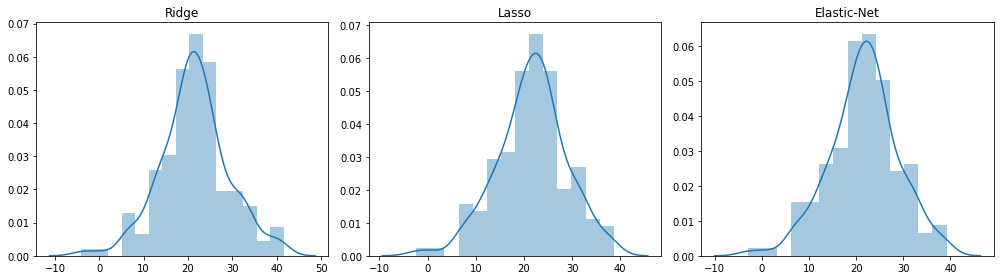

In [48]:
## Plot the distribution plot among these predicted values

plt.figure(figsize= (14,4))
plt.subplot(1, 3, 1)
sns.distplot(Y_pred_ridge)
plt.title("Ridge")
#plt.xlabel('Population of City in 10,000s')
#plt.ylabel('Profit in $10,000s')

plt.subplot(1, 3, 2)
plt.title("Lasso")
sns.distplot(Y_pred_lasso)
#plt.xlabel('Population of City in 10,000s')
#plt.ylabel('Profit in $10,000s')

plt.subplot(1, 3, 3)
plt.title("Elastic-Net")
sns.distplot(Y_pred_elastic_net)
#plt.xlabel('Population of City in 10,000s')
#plt.ylabel('Profit in $10,000s')

plt.tight_layout()
plt.show()

We can observer that Predicted output value is better spread using Elastic-Net Model